In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
data_spam = 'spam.csv'

df = pd.read_csv(data_spam, encoding='latin-1')



# Dropping extra columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=columns_to_drop, inplace=True)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['v1'])
df.head(3)


,v1,v2,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


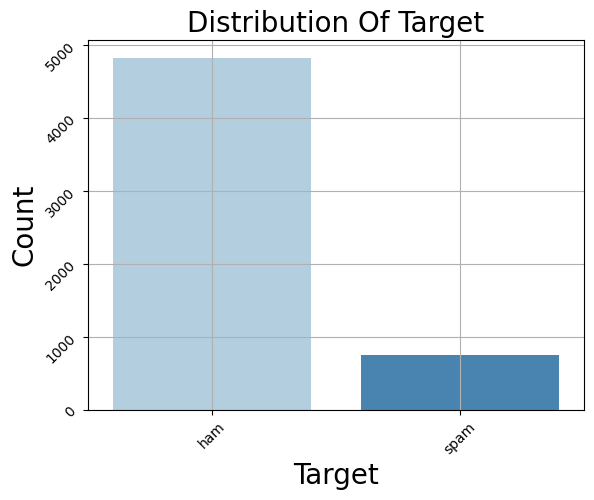

In [4]:
sns.countplot(x='v1',data=df,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [7]:
Text=df.v2

Target=df.v1

Target.replace('spam',1,inplace=True)
Target.replace('ham',0,inplace=True)
Target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [9]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjusting the max_features

X_train, X_test, y_train, y_test = train_test_split(Text, Target, test_size=0.2, random_state=42)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)


X_train Shape : (4457,)
X_test Shape : (1115,)
y_train Shape : (4457,)
y_test Shape : (1115,)


In [14]:
model=Pipeline([
    ('tfid',TfidfVectorizer()),
    ('model',MultinomialNB())
    ])
model.fit(X_train,y_train)


print('Model Train Score is : ' , model.score(X_train, y_train))
print('Model Test Score is : ' , model.score(X_test, y_test))

Model Train Score is :  0.9728516939645502
Model Test Score is :  0.9623318385650225


In [13]:
y_pred=model.predict(X_test)
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
3245,0,0
944,0,0
1044,1,0
2484,0,0
812,1,1
...,...,...
4264,0,0
2439,0,0
5556,0,0
4205,0,0
